In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_centers = pd.read_csv("data_centers.csv", usecols=['country', 'total_data_centers', 'hyperscale_data_centers',
                                                        'colocation_data_centers', 'floor_space_sqft_total',
                                                        'power_capacity_MW_total', 'average_renewable_energy_usage_percent',
                                                        'tier_distribution', 'key_operators', 'cloud_provider',
                                                        'internet_penetration_percent','growth_rate_of_data_centers_percent_per_year',
                                                        'cooling_technologies_common'],
                          na_values=['N/A', 'NA', 'unknown', '', None, 'Unknown', '?', 'No data'])
display(data_centers.head())

,country,total_data_centers,hyperscale_data_centers,colocation_data_centers,floor_space_sqft_total,power_capacity_MW_total,average_renewable_energy_usage_percent,tier_distribution,key_operators,cloud_provider,internet_penetration_percent,growth_rate_of_data_centers_percent_per_year,cooling_technologies_common
0,United States,5426,300+,"~2,000+","~3,552,000,000","~12,000+",~27%,"I:5%, II:15%, III:60%, IV:20%","Equinix, Digital Realty, CoreSite, AWS","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92%,12%,"Air, Liquid, Immersion"
1,Germany,529,50,~200,"~350,000,000","~2,000+",40%+,"II:10%, III:70%, IV:20%","Equinix, Digital Realty, e-shelter","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",92%,8%,"Air, Indirect Evap."
2,United Kingdom,523,30,~150,"~200,000,000","~1,000+",0.45,"II:15%, III:70%, IV:15%","Equinix, Telehouse, Virtus","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",96%,7%,"Air, Free Cooling"
3,China,449,100,"~1,000+","~500,000,000","~8,000+",0.25,"II:20%, III:60%, IV:20%","China Unicom, Tencent, Alibaba, GDS","AWS:Yes, GCP:No, Azure:Yes, Oracle:Yes",76%,15%,"Air, Liquid"
4,France,322,20,~110,"~120,000,000",~700,40%+,"II:20%, III:70%, IV:10%","Equinix, Interxion, Data4","AWS:Yes, GCP:Yes, Azure:Yes, Oracle:Yes",91%,6%,"Air, Liquid"


In [3]:
print(data_centers.info())
data_centers.describe()
print(data_centers.isnull().sum()) #gives a sum of all the misisng values per variable/column in df
print(data_centers.columns)
print(data_centers.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   country                                       191 non-null    object
 1   total_data_centers                            191 non-null    int64 
 2   hyperscale_data_centers                       191 non-null    object
 3   colocation_data_centers                       191 non-null    object
 4   floor_space_sqft_total                        184 non-null    object
 5   power_capacity_MW_total                       165 non-null    object
 6   average_renewable_energy_usage_percent        148 non-null    object
 7   tier_distribution                             179 non-null    object
 8   key_operators                                 170 non-null    object
 9   cloud_provider                                149 non-null    object
 10  in

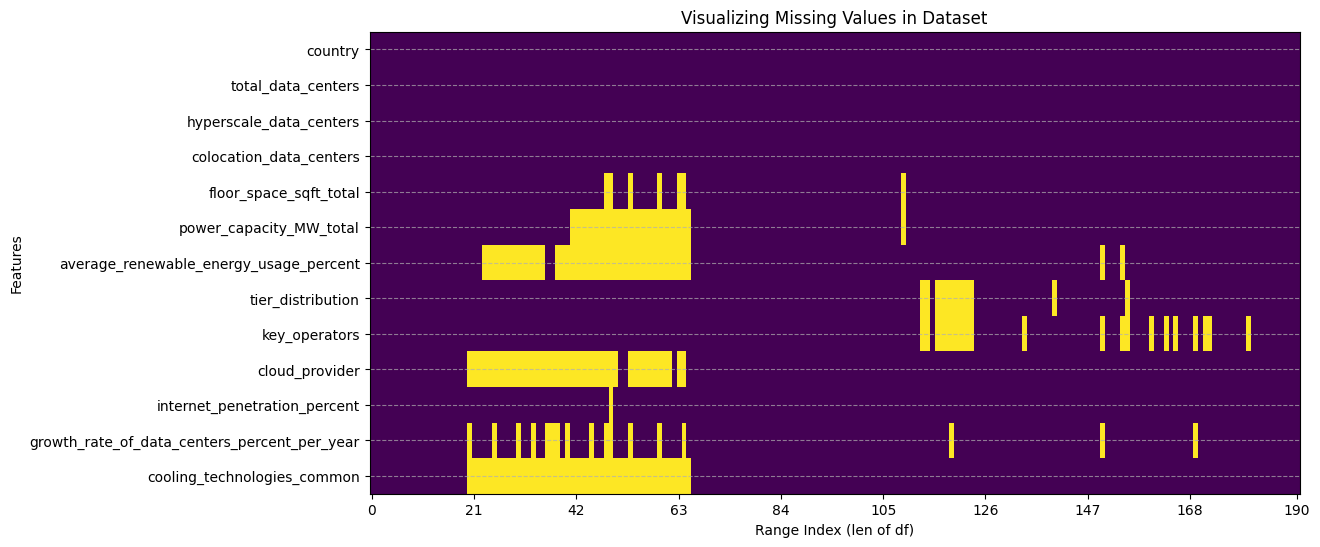

In [4]:
data_centers_dropped_columns = data_centers[['country', 'total_data_centers', 'hyperscale_data_centers',
       'colocation_data_centers', 'floor_space_sqft_total',
       'power_capacity_MW_total', 'average_renewable_energy_usage_percent',
       'tier_distribution', 'key_operators', 'cloud_provider',
       'internet_penetration_percent',
       'growth_rate_of_data_centers_percent_per_year',
       'cooling_technologies_common']]

nan_mask = data_centers_dropped_columns.isna()
nan_array = nan_mask.astype(int).to_numpy()

plt.figure(figsize=(12, 6))
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')
plt.xlabel('Range Index (len of df)')
plt.ylabel('Features')
plt.title('Visualizing Missing Values in Dataset')

plt.yticks(range(len(data_centers_dropped_columns.columns)), data_centers_dropped_columns.columns)

data_centers_dropped_columns_values = nan_array.shape[0]
plt.xticks(np.linspace(0, data_centers_dropped_columns_values-1, min(10, data_centers_dropped_columns_values)).astype(int)) #zero indexed, but this is basically the len of df1
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Standardizing individual columns to be numeric.

### "hyperscale_data_centers" - before cleaning

In [5]:
print(data_centers["hyperscale_data_centers"].dtype)
print(data_centers["hyperscale_data_centers"].unique())
print("len of unique:", len(data_centers["hyperscale_data_centers"].unique()))

object
['300+' '50' '30' '100' '20' '15' '10' '5' '8' '6' '3' '4' '0' '1' '~12']
len of unique: 15


### "colocation_data_centers" - before cleaning

In [6]:
print(data_centers["colocation_data_centers"].dtype)
print(data_centers["colocation_data_centers"].unique())
print("len of unique:", len(data_centers["colocation_data_centers"].unique()))

object
['~2,000+' '~200' '~150' '~1,000+' '~110' '~100' '~80' '~90' '~60' '~30'
 '~50' '~32' '~40' '2' '3' '5' '1' '4' '34' '6' '68' '16' '32' '27' '0'
 '31' '10' '18' '36' '42' '7' '15' '19' '20' '37' '52' '11' '35' '9' '12'
 '30' '17' '26' '22' '8' '21' '13' '60' '55']
len of unique: 49


### "power_capacity_MW_total" - before cleaning

In [7]:
print(data_centers["power_capacity_MW_total"].dtype)
print(data_centers["power_capacity_MW_total"].unique())
print("len of unique:", len(data_centers["power_capacity_MW_total"].unique()))

object
['~12,000+' '~2,000+' '~1,000+' '~8,000+' '~700' '~500' '~1,200' '~400'
 '~1,000' '~800' '~200' '~300' '~250' '~150' '~120' '~110' '1,270' '2,730'
 '150' '20' '90' '10' '100' '60' '450' '110' '180' '30' '200' '300' '15'
 '8' nan '5' '3' '1' '~20' '57' '0' '2' '80' '50' '12' '710' '250' '513'
 '120' '566' '~25' '7' '4' '211' '137' '501' '18' '1,367' '497' '48' '345'
 '25' '35' '145']
len of unique: 62


### "internet_penetration_percent" - before cleaning

In [8]:
print(data_centers["internet_penetration_percent"].dtype)
print(data_centers["internet_penetration_percent"].unique())
print("len of unique:", len(data_centers["internet_penetration_percent"].unique()))

object
['92%' '96%' '76%' '91%' '85%' '94%' '82%' '72%' '56%' '69%' '93%' '87%'
 '97%' '18%' '86%' '24%' '9550%' '6190%' '78%' '8740%' '7590%' '9120%'
 '7980%' '95%' '98%' '~75%' '80%' '~50%' '32%' '8840%' '~97%' '88%' '~34%'
 '~10%' '~98%' '~40%' nan '13%' '27%' '~25%' '~30%' '~95%' '38%' '~90%'
 '~68%' '~92%' '~99%' '65%' '83%' '~74%' '84' '77%' '45%' '40%' '25%'
 '55%' '35%' '70%' '74%' '33%' '37%' '39%' '66%' '89%' '100%' '79%' '61%'
 '46%' '41%' '60%' '200%' '93' '88.5' '79' '89' '92' '47' '32.4' '88' '97'
 '100' '20' '27.7' '81' '84.7' '35.1' '93.5' '73' '37.4' '79.5' '40.5'
 '94.3' '99' '83' '89.8' '90' '23' '41' '64.4' '50' '96.2' '71.3' '150'
 '48.2' '95.3' '57.5' '78' '24.1' '98' '85.5' '38' '70' '74' '77.7' '75'
 '61.5' '60.6' '87.7' '87.4' '~130' '130' '55.2' '28.7' '78.4' '56.8'
 '58.5' '66.8' '82' '34.9' '28' '82.4' '90.9' '35' '44' '80.7' '33']
len of unique: 136


### "floor_space_sqft_total" - before cleaning

In [9]:
print(data_centers["floor_space_sqft_total"].dtype)
print(data_centers["floor_space_sqft_total"].unique())
print("len of unique:", len(data_centers["floor_space_sqft_total"].unique()))

object
['~3,552,000,000' '~350,000,000' '~200,000,000' '~500,000,000'
 '~120,000,000' '~90,000,000' '~40,000,000' '~35,000,000' '~20,000,000'
 '~50,000,000' '~30,000,000' '~10,000,000' '~14,000,000' '~12,000,000'
 '~8,000,000' '~7,000,000' '~10,000+' '~71,100+' '~18300' '~1,830'
 '~108,300' '5,000' '~721,000' '26,748' '~720,000' '~18,534' '40,000'
 '129,000' '~300000' '882,641' '1,245,085' '12,000' '2,500' '~137,800'
 '11,711' '35,200' '51,000' '281,991' '6,308' '~206000' '14,234' nan
 '~20,000' '720,630' '~27878' '~3710' '292,761' '~146763' '101,756'
 '~13000' '~355000' '1,100,000' '2,404' '25000-40000' '25,000-40,000'
 '15000-30000' '7,500' '6,000' '65,000' '8,000' '7,000' '120,000' '10,000'
 '~695,000' '250,000' '0' '150,000' '64,583' '50,000' '20,000' '500,000'
 '3,940,000' '13,000' '30,000' '112,000' '2,898,200' '270,000' '3,000'
 '4,300' '300,000' '2,800,000' '43,000' '22,000' '18,000' '28,000'
 '320,000' '15,000' '430,000' '3,000,000' '94,000' '35,000' '58,000'
 '2,280,000' '326

### "average_renewable_energy_usage_percent" - before cleaning

In [10]:
print(data_centers["average_renewable_energy_usage_percent"].dtype)
print(data_centers["average_renewable_energy_usage_percent"].unique())
print("len of unique:", len(data_centers["average_renewable_energy_usage_percent"].unique()))

object
['~27%' '40%+' '0.45' '0.25' '0.78' '0.30' '0.90' '0.15' '0.95'
 '45% (target 2030)' '0.98' '0.20' '0.35' '0.80' '50.00' '100.00' '60.00'
 nan '40.00' '30-35%' '20-30%' '12.00' '10.00' '45.00' '15.00' '20.00'
 '~82' '70.00' '82.00' '74.00' '33.90' '32.50' '37.00' '39.00' '66.00'
 '25.00' '79.00' '69.00' '41.00' '46.00' '92.00' '93.00' '1.00' '88.50'
 '42.00' '47.00' '32.00' '88.00' '97.00' '76.00' '0.00' '89.80' '90.00'
 '64.40' '96.00' '71.30' '48.20' '98.00' '95.00' '57.50' '78.00' '24.00'
 '83.00' '79.50' '85.50' '99.00' '38.00' '77.70' '75.00' '61.50' '60.60'
 '87.40' '4.00' '2.00' '55.20' '28.70' '78.40' '35.80' '56.80' '36.30'
 '44.30' '58.50' '84.70' '66.80' '34.90' '5.00' '28.00' '82.40' '35.00'
 '44.00' '80.70' '33.00' '3.00']
len of unique: 93


### "growth_rate_of_data_centers_percent_per_year" - before cleaning

In [11]:
print(data_centers["growth_rate_of_data_centers_percent_per_year"].dtype)
print(data_centers["growth_rate_of_data_centers_percent_per_year"].unique())
print("len of unique:", len(data_centers["growth_rate_of_data_centers_percent_per_year"].unique()))

object
['12%' '8%' '7%' '15%' '6%' '9%' '10%' '18%' '14%' nan '~8 (est.)' '~15%'
 '5%' '~7% growth' '~10.7% CAGR' '~30% CAGR' '~8% growth' '~4% CAGR'
 '~10% growth' '~15% growth' '~12% growth' '~5.8% CAGR' '~7% CAGR'
 '~8–12% growth' '~12% CAGR' '~5% growth' '~6% CAGR' '~6–13% CAGR' '400%'
 '7-10%' '5-8%' '300%' '200%' '800%' '1200%' '~10–15\u202f% annual growth'
 '1000%' '1400%' '500%' '600%' '1500%' '480%' '710%' '410%' '1300%'
 '3000%' '700%' '860%' '650%' '8\u202f%' '0%' '290%' '1120%' '725%'
 '1334%' '610%' '1580%' '790%' '1029%' '1030%' '441%' '1840%' '1170%'
 '180%' '1280%' '1560%' '2080%' '2180%' '798%' '4900%' '210%' '20%' '50%'
 '1060%' '1760%' '230%' '510%' '190%' '550%' '350%' '745%' '160%' '90%'
 '-40%' '1010%' '100%' '780%' '955%' '791%' '1790%' '629%']
len of unique: 91


## Cleaning columns

In [12]:
# Simple cleaning of numeric columns by removing unwanted characters and converting to numeric types (~+,%())
simple_columns_to_clean = [
    'hyperscale_data_centers',
    'colocation_data_centers',
    'power_capacity_MW_total',
    'internet_penetration_percent']

for col in simple_columns_to_clean:
    data_centers[col] = pd.to_numeric(
        data_centers[col].astype(str).str.replace(r'[~+,%]', '', regex=True),
        errors='coerce'
    )

## Extra cleaning for "internet_penetration_percent" for incorrectly stored values (Ex: 9550 is 95.50)

In [13]:
def fix_percentage(x):
    if pd.isna(x):
        return x
    while x > 100:
        x = x / 10
    return x

# Apply the fix to values over 100
data_centers["internet_penetration_percent"] = data_centers["internet_penetration_percent"].apply(fix_percentage)

print("\nAfter fixing values over 100:")
print(data_centers["internet_penetration_percent"].unique())
print("len of unique:", len(data_centers["internet_penetration_percent"].unique()))


After fixing values over 100:
[ 92.   96.   76.   91.   85.   94.   82.   72.   56.   69.   93.   87.
  97.   18.   86.   24.   95.5  61.9  78.   87.4  75.9  91.2  79.8  95.
  98.   75.   80.   50.   32.   88.4  88.   34.   10.   40.    nan  13.
  27.   25.   30.   38.   90.   68.   99.   65.   83.   74.   84.   77.
  45.   55.   35.   70.   33.   37.   39.   66.   89.  100.   79.   61.
  46.   41.   60.   20.   88.5  47.   32.4  27.7  81.   84.7  35.1  93.5
  73.   37.4  79.5  40.5  94.3  89.8  23.   64.4  96.2  71.3  15.   48.2
  95.3  57.5  24.1  85.5  77.7  61.5  60.6  87.7  55.2  28.7  78.4  56.8
  58.5  66.8  34.9  28.   82.4  90.9  44.   80.7]
len of unique: 104


In [14]:
complex_columns_to_clean = [
    'average_renewable_energy_usage_percent', #has text + ranges of values
    'growth_rate_of_data_centers_percent_per_year', # text + ranges of values
    'floor_space_sqft_total'] # has ranges of values

for col in complex_columns_to_clean:
    data_centers[col] = data_centers[col].str.replace('–', '-', regex=False)  # Replace emdash
    
    # Special handling for floor_space_sqft_total to preserve commas
    if col == 'floor_space_sqft_total':
        # Remove only ~ and + symbols, keep commas for now
        data_centers[col] = data_centers[col].str.replace(r'[~+]', '', regex=True)
        # Extract number with commas and ranges
        data_centers[col] = data_centers[col].str.extract(r'([\d,]+\.?\d*-?[\d,]*\.?\d*)', expand=False)
    else:
        data_centers[col] = data_centers[col].str.extract(r'(\d+\.?\d*-?\d*\.?\d*)', expand=False)

In [15]:
print(data_centers["average_renewable_energy_usage_percent"].dtype)
print(data_centers["average_renewable_energy_usage_percent"].unique())
print("len of unique:", len(data_centers["average_renewable_energy_usage_percent"].unique()))
data_centers.loc[data_centers["average_renewable_energy_usage_percent"] == '30-35', "average_renewable_energy_usage_percent"] = '32.50'
data_centers.loc[data_centers["average_renewable_energy_usage_percent"] == '20-30', "average_renewable_energy_usage_percent"] = '25.00'

object
['27' '40' '0.45' '0.25' '0.78' '0.30' '0.90' '0.15' '0.95' '45' '0.98'
 '0.20' '0.35' '0.80' '50.00' '100.00' '60.00' nan '40.00' '30-35' '20-30'
 '12.00' '10.00' '45.00' '15.00' '20.00' '82' '70.00' '82.00' '74.00'
 '33.90' '32.50' '37.00' '39.00' '66.00' '25.00' '79.00' '69.00' '41.00'
 '46.00' '92.00' '93.00' '1.00' '88.50' '42.00' '47.00' '32.00' '88.00'
 '97.00' '76.00' '0.00' '89.80' '90.00' '64.40' '96.00' '71.30' '48.20'
 '98.00' '95.00' '57.50' '78.00' '24.00' '83.00' '79.50' '85.50' '99.00'
 '38.00' '77.70' '75.00' '61.50' '60.60' '87.40' '4.00' '2.00' '55.20'
 '28.70' '78.40' '35.80' '56.80' '36.30' '44.30' '58.50' '84.70' '66.80'
 '34.90' '5.00' '28.00' '82.40' '35.00' '44.00' '80.70' '33.00' '3.00']
len of unique: 93


In [16]:
print(data_centers["growth_rate_of_data_centers_percent_per_year"].dtype)
print(data_centers["growth_rate_of_data_centers_percent_per_year"].unique())
print("len of unique:", len(data_centers["growth_rate_of_data_centers_percent_per_year"].unique()))
data_centers.loc[data_centers["growth_rate_of_data_centers_percent_per_year"] == '8-12', "growth_rate_of_data_centers_percent_per_year"] = '10'
data_centers.loc[data_centers["growth_rate_of_data_centers_percent_per_year"] == '6-13', "growth_rate_of_data_centers_percent_per_year"] = '9.5'
data_centers.loc[data_centers["growth_rate_of_data_centers_percent_per_year"] == '7-10', "growth_rate_of_data_centers_percent_per_year"] = '8.5'
data_centers.loc[data_centers["growth_rate_of_data_centers_percent_per_year"] == '5-8', "growth_rate_of_data_centers_percent_per_year"] = '6.5'
data_centers.loc[data_centers["growth_rate_of_data_centers_percent_per_year"] == '10-15', "growth_rate_of_data_centers_percent_per_year"] = '12.5'

object
['12' '8' '7' '15' '6' '9' '10' '18' '14' nan '5' '10.7' '30' '4' '5.8'
 '8-12' '6-13' '400' '7-10' '5-8' '300' '200' '800' '1200' '10-15' '1000'
 '1400' '500' '600' '1500' '480' '710' '410' '1300' '3000' '700' '860'
 '650' '0' '290' '1120' '725' '1334' '610' '1580' '790' '1029' '1030'
 '441' '1840' '1170' '180' '1280' '1560' '2080' '2180' '798' '4900' '210'
 '20' '50' '1060' '1760' '230' '510' '190' '550' '350' '745' '160' '90'
 '40' '1010' '100' '780' '955' '791' '1790' '629']
len of unique: 79


In [17]:
print(data_centers["floor_space_sqft_total"].dtype)
print(data_centers["floor_space_sqft_total"].unique())
print("len of unique:", len(data_centers["floor_space_sqft_total"].unique()))
data_centers.loc[data_centers["floor_space_sqft_total"] == '15000-30000', "floor_space_sqft_total"] = '22500'
data_centers.loc[data_centers["floor_space_sqft_total"] == '25000-40000', "floor_space_sqft_total"] = '32500'

object
['3,552,000,000' '350,000,000' '200,000,000' '500,000,000' '120,000,000'
 '90,000,000' '40,000,000' '35,000,000' '20,000,000' '50,000,000'
 '30,000,000' '10,000,000' '14,000,000' '12,000,000' '8,000,000'
 '7,000,000' '10,000' '71,100' '18300' '1,830' '108,300' '5,000' '721,000'
 '26,748' '720,000' '18,534' '40,000' '129,000' '300000' '882,641'
 '1,245,085' '12,000' '2,500' '137,800' '11,711' '35,200' '51,000'
 '281,991' '6,308' '206000' '14,234' nan '20,000' '720,630' '27878' '3710'
 '292,761' '146763' '101,756' '13000' '355000' '1,100,000' '2,404'
 '25000-40000' '25,000-40,000' '15000-30000' '7,500' '6,000' '65,000'
 '8,000' '7,000' '120,000' '695,000' '250,000' '0' '150,000' '64,583'
 '50,000' '500,000' '3,940,000' '13,000' '30,000' '112,000' '2,898,200'
 '270,000' '3,000' '4,300' '300,000' '2,800,000' '43,000' '22,000'
 '18,000' '28,000' '320,000' '15,000' '430,000' '3,000,000' '94,000'
 '35,000' '58,000' '2,280,000' '326,000' '200,000' '1,380,000' '137,674'
 '95,000' '24,000

## Lastly converting the complex columns to numeric.

In [18]:
for complex_col in complex_columns_to_clean:
    if complex_col == 'floor_space_sqft_total':
        # Remove commas before converting to numeric
        data_centers[complex_col] = pd.to_numeric(
            data_centers[complex_col].astype(str).str.replace(',', '', regex=False),
            errors='coerce'
        )
    else:
        data_centers[complex_col] = pd.to_numeric(
            data_centers[complex_col].astype(str).str.replace(r'[~+,%]', '', regex=True),
            errors='coerce'
        )

In [19]:
# Checking final types
print(data_centers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   country                                       191 non-null    object 
 1   total_data_centers                            191 non-null    int64  
 2   hyperscale_data_centers                       191 non-null    int64  
 3   colocation_data_centers                       191 non-null    int64  
 4   floor_space_sqft_total                        183 non-null    float64
 5   power_capacity_MW_total                       165 non-null    float64
 6   average_renewable_energy_usage_percent        148 non-null    float64
 7   tier_distribution                             179 non-null    object 
 8   key_operators                                 170 non-null    object 
 9   cloud_provider                                149 non-null    obj

## Saving to new cleaned csv file.

In [20]:
data_centers.to_csv('cleaned_numeric_data_centers.csv', index=False)